In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\WAASIM\Desktop\Projects\Zomato_Casestudy\Dataset\Zomato.csv", encoding='latin1')

In [5]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
data = data.drop(['Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
                  'Currency', 'Switch to order menu', 'Rating color', 'Rating text'], 
                 axis=1, errors='ignore')

In [12]:
data.shape

(9551, 12)

In [14]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Votes
0,6317637,Le Petit Souffle,162,Makati City,"French, Japanese, Desserts",1100,Yes,No,No,3,4.8,314
1,6304287,Izakaya Kikufuji,162,Makati City,Japanese,1200,Yes,No,No,3,4.5,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,4,4.4,270
3,6318506,Ooma,162,Mandaluyong City,"Japanese, Sushi",1500,No,No,No,4,4.9,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Japanese, Korean",1500,Yes,No,No,4,4.8,229


In [16]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Cuisines                9
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

# DataCleaning

In [18]:
feature_na = [i for i in data.columns if data[i].isnull().sum() > 0]
feature_na

['Cuisines']

In [20]:
for i in feature_na:
    print(f"{i} has {np.round(data[i].isnull().sum()/len(data[i])*100, 4)}% null values")

Cuisines has 0.0942% null values


In [22]:
data.Cuisines.unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [25]:
data.Cuisines

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [24]:
data.dropna(subset=['Cuisines'],axis=0,inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Cuisines              9542 non-null   object 
 5   Average Cost for two  9542 non-null   int64  
 6   Has Table booking     9542 non-null   object 
 7   Has Online delivery   9542 non-null   object 
 8   Is delivering now     9542 non-null   object 
 9   Price range           9542 non-null   int64  
 10  Aggregate rating      9542 non-null   float64
 11  Votes                 9542 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 969.1+ KB


## Calulating AVG rating for each restaurant

In [28]:
data.rename(columns={'Aggregate rating': 'Rating'}, inplace=True)

In [33]:
Rating = pd.pivot_table(data, index='Restaurant Name', values='Rating')
Rating

,Rating
Restaurant Name,
Let's Burrrp,0.0
#45,3.6
#Dilliwaala6,3.7
#InstaFreeze,0.0
#OFF Campus,3.7
...,...
t Lounge by Dilmah,3.6
tashas,4.1
wagamama,3.7


In [35]:
Rating = Rating.sort_values(['Rating'],ascending=False)
Rating[0:15]

,Rating
Restaurant Name,
Sheroes Hangout,4.9
Yellow Dog Eats,4.9
Miann,4.9
Milse,4.9
Grandson of Tunday Kababi,4.9
Spiral - Sofitel Philippine Plaza Manila,4.9
Solita,4.9
Shorts Burger and Shine,4.9
Ministry of Crab,4.9


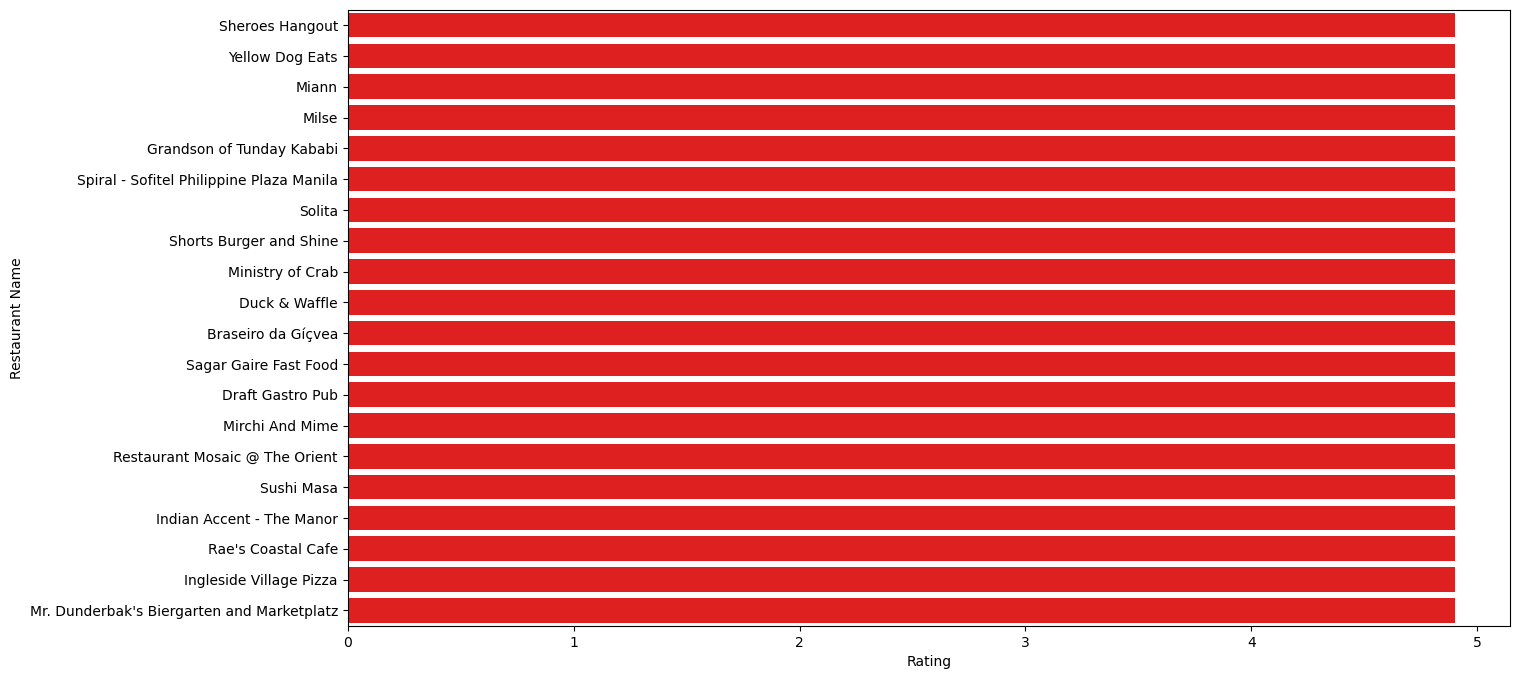

In [39]:
plt.figure(figsize=(15, 8))
sns.barplot(x=Rating[0:20].Rating, y=Rating[0:20].index, orient="h", color="red")
plt.show()

We can see the Top resturants have highest number of average ratings


## Distribution Of Ratings



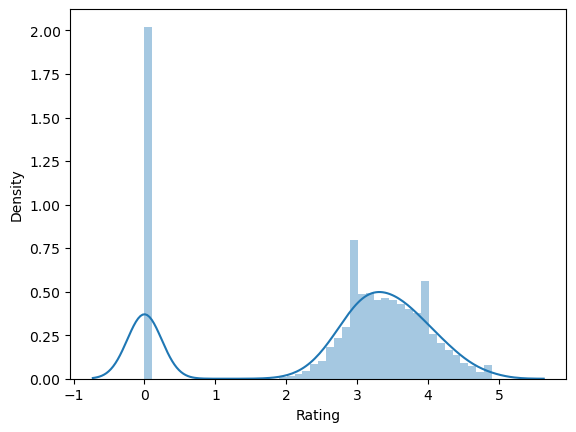

In [126]:
sns.distplot(data['Rating'])

plt.show()

## Top restaurant chains

In [37]:
data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: count, Length: 7437, dtype: int64

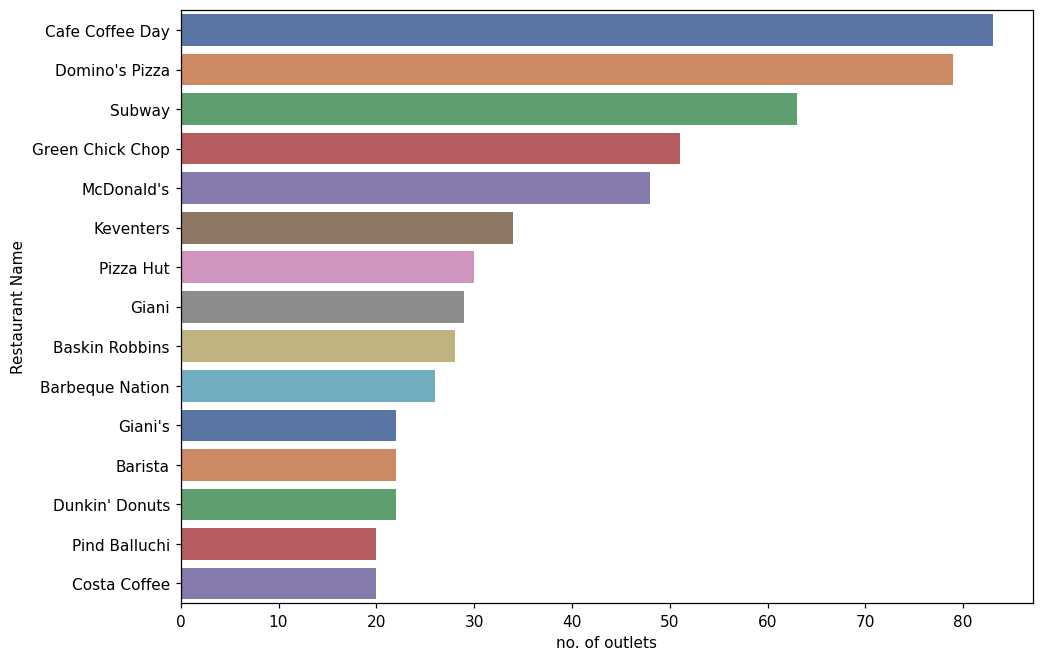

In [135]:
plt.figure(figsize=(10,7),dpi=110)

chains = data['Restaurant Name'].value_counts()[0:15]

sns.barplot(x=chains,y=chains.index,palette='deep')
plt.xlabel("no. of outlets")

plt.show()

These are top Restaurants and 'Cafe coffee day' being the top.


 # How many Restaurants don't accept online orders 

In [30]:
data.rename(columns={'Has Online delivery': 'Online_order'}, inplace=True)

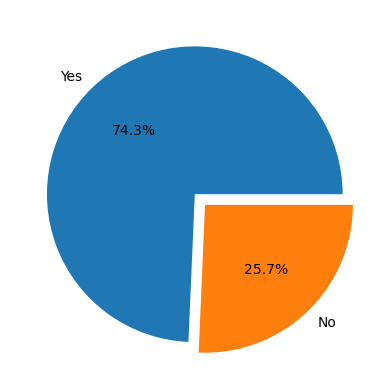

In [56]:
x = data.Online_order.value_counts()
labels = ['Yes','No']
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%1.1f%%')

plt.show()

 We see that 74.3% of Restaurants accept online orders

 ## How many Resturants had Table Bookings?

In [32]:
data.rename(columns={'Has Table booking': 'Table_booking'}, inplace=True)

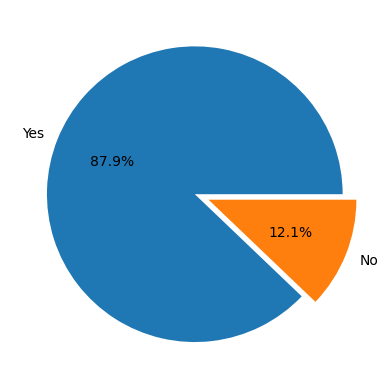

In [69]:
x=data.Table_booking.value_counts()
labels = ['Yes','No']
plt.pie(x,labels=labels,explode=[0.0,0.1],autopct='%1.1f%%')

plt.show()

 we observe that around 85.4% resturants have table bookings

 ## Which Restaurant has highest voting? (mean count of Voting given)

In [54]:
voting = data.groupby('Restaurant Name')[['Votes']].mean()
voting

,Votes
Restaurant Name,
Let's Burrrp,0.0
#45,209.0
#Dilliwaala6,124.0
#InstaFreeze,2.0
#OFF Campus,216.0
...,...
t Lounge by Dilmah,34.0
tashas,374.0
wagamama,131.0


In [56]:
voting['Votes'].describe()

count     7437.000000
mean       152.065283
std        401.475959
min          0.000000
25%          4.000000
50%         28.000000
75%        130.000000
max      10934.000000
Name: Votes, dtype: float64

In [58]:
high_votes = voting[voting['Votes'] >5000]

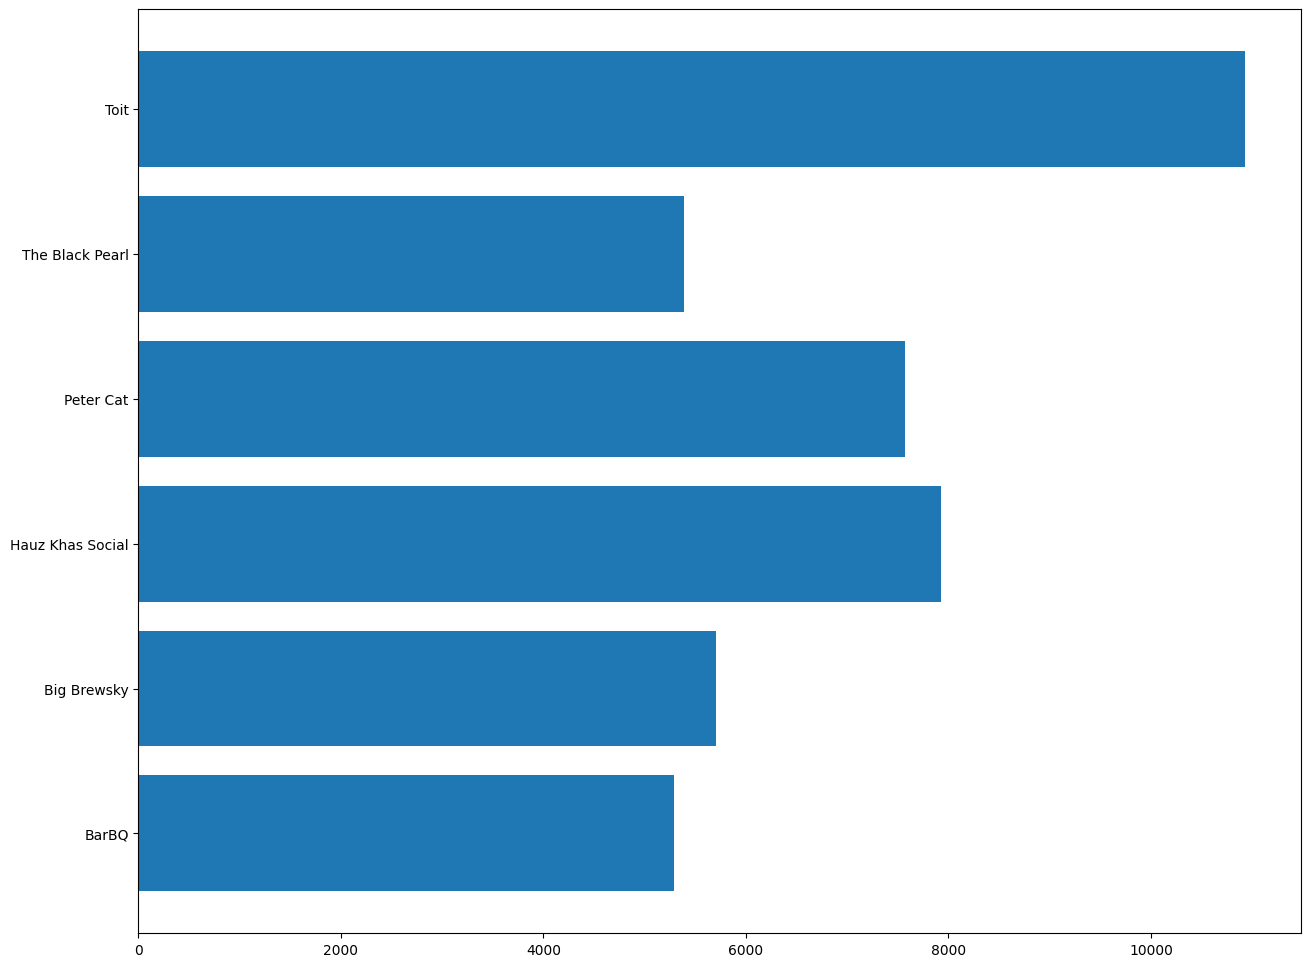

In [60]:
plt.figure(figsize=(15,12),dpi=100)

plt.barh(high_votes.index,high_votes['Votes'])

plt.show()

These are the Restaurants had the highest votings.

 ## Analyse the Highly rated restaurants and worst Restaurants based on number of ratings given.

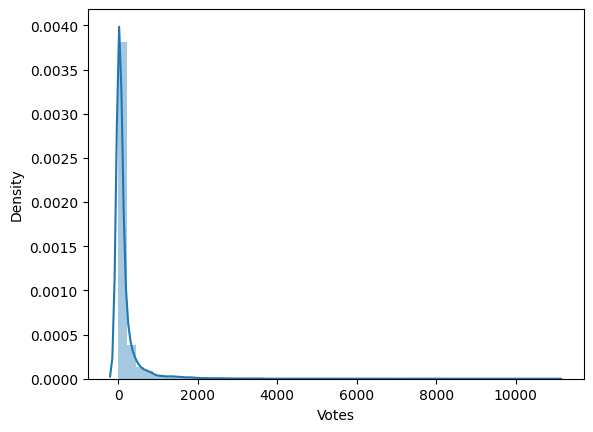

In [62]:
sns.distplot(data['Votes'])
plt.show()

In [64]:
voting_rating = data.groupby('Restaurant Name')[['Votes']].mean().sort_values('Votes',ascending=False)
voting_rating

,Votes
Restaurant Name,
Toit,10934.0
Hauz Khas Social,7931.0
Peter Cat,7574.0
Big Brewsky,5705.0
The Black Pearl,5385.0
...,...
Moju Juice Bar,0.0
Daya Sagar,0.0
Smoke Trailer Grill,0.0


In [66]:
voting_rating['Restaurant Name'] = voting_rating.index

In [68]:
voting_rating = voting_rating.reset_index(drop=True)
voting_rating.head()

,Votes,Restaurant Name
0,10934.0,Toit
1,7931.0,Hauz Khas Social
2,7574.0,Peter Cat
3,5705.0,Big Brewsky
4,5385.0,The Black Pearl


In [88]:
voting_rating = pd.merge(voting_rating,data[['Rating','Restaurant Name']])
voting_rating

,Votes,Restaurant Name,Rating
0,10934.0,Toit,4.8
1,7931.0,Hauz Khas Social,4.3
2,7574.0,Peter Cat,4.3
3,5705.0,Big Brewsky,4.5
4,5385.0,The Black Pearl,4.1
...,...,...,...
36777,0.0,Moju Juice Bar,0.0
36778,0.0,Daya Sagar,0.0
36779,0.0,Smoke Trailer Grill,0.0
36780,0.0,Kaushal Dhaba,0.0


In [90]:
top_votes = voting_rating[voting_rating['Votes'] > 5000]

top_votes.head()

,Votes,Restaurant Name,Rating
0,10934.0,Toit,4.8
1,7931.0,Hauz Khas Social,4.3
2,7574.0,Peter Cat,4.3
3,5705.0,Big Brewsky,4.5
4,5385.0,The Black Pearl,4.1


In [86]:
top_votes = top_votes.reset_index()

In [92]:
top_votes = top_votes.groupby('Restaurant Name')[['Rating']].mean().sort_values('Rating',ascending=False)
top_votes



,Rating
Restaurant Name,
Toit,4.8
Big Brewsky,4.5
Hauz Khas Social,4.3
Peter Cat,4.3
BarBQ,4.2
The Black Pearl,4.1


 ### highest Rated based on most number of votes

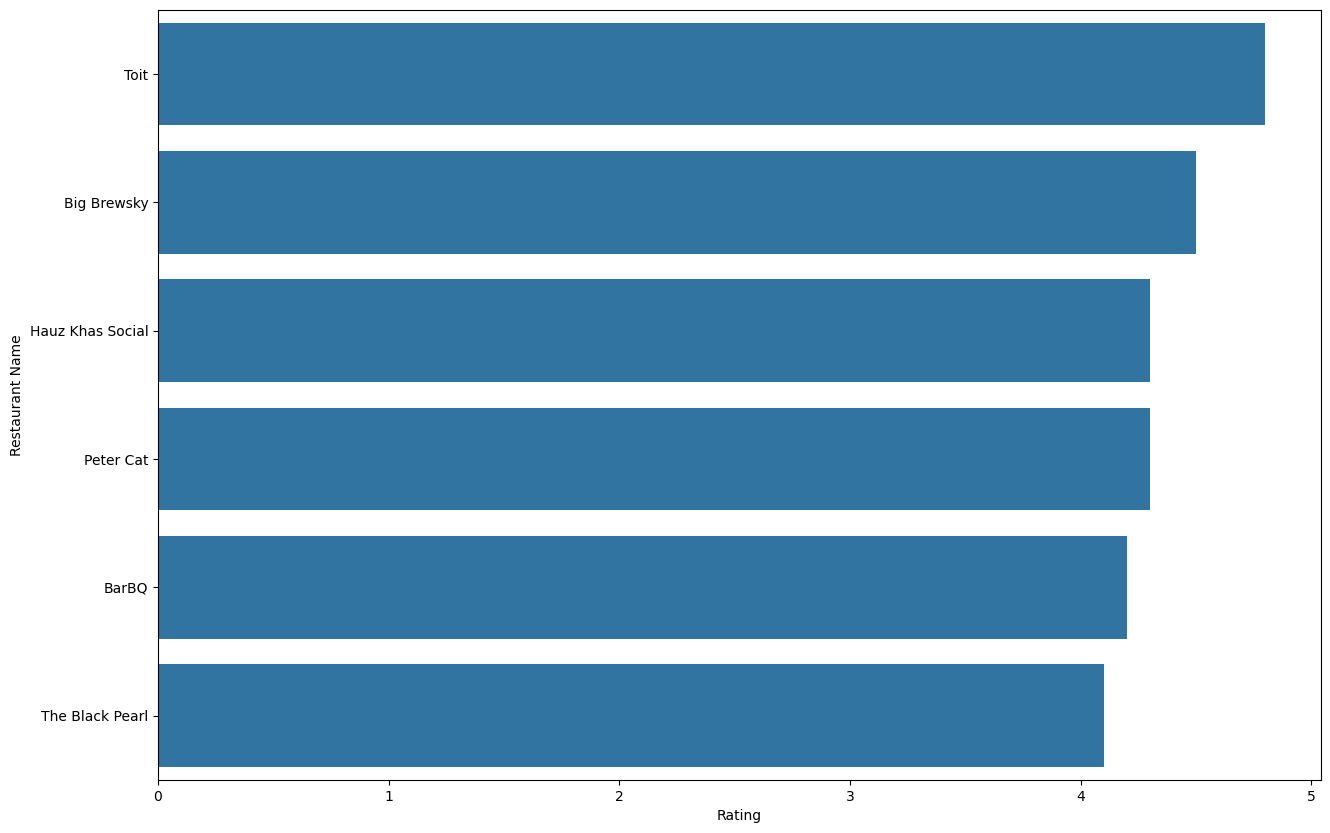

In [119]:
plt.figure(figsize=(15,10),dpi=100)

sns.barplot(x=top_votes['Rating'],y=top_votes.index,orient='h')

plt.show()

 'Toit' is the most voted resturant with the average rating of 4.8

In [94]:
low_votes = voting_rating[(voting_rating['Rating'] < 3) & (voting_rating['Rating'] > 0)]

low_votes

,Votes,Restaurant Name,Rating
80,2460.000000,My Bar Lounge & Restaurant,2.7
87,2412.000000,The Wine Company,2.4
351,1096.000000,My Bar Square,2.5
1064,658.571429,Khan Chacha,2.9
1209,549.000000,Not Just Paranthas,2.7
...,...,...,...
34401,2.500000,Snacks Point,2.9
34429,2.250000,Chai Garam,2.9
34674,2.000000,Hot & Spicy,2.9
34707,2.000000,Fresh Meat CO,2.9


In [124]:
worst_restaurants = low_votes[low_votes['Votes'] > 500].groupby('Restaurant Name')[['Rating']].mean()
worst_restaurants

,Rating
Restaurant Name,
Cheenos,2.60
Karim's,2.65
Khan Chacha,2.90
My Bar Lounge & Restaurant,2.70
My Bar Square,2.50
Not Just Paranthas,2.70
Rajasthali,2.90
The Wine Company,2.40


 ### Worst Restaurants based on highest number of votes given

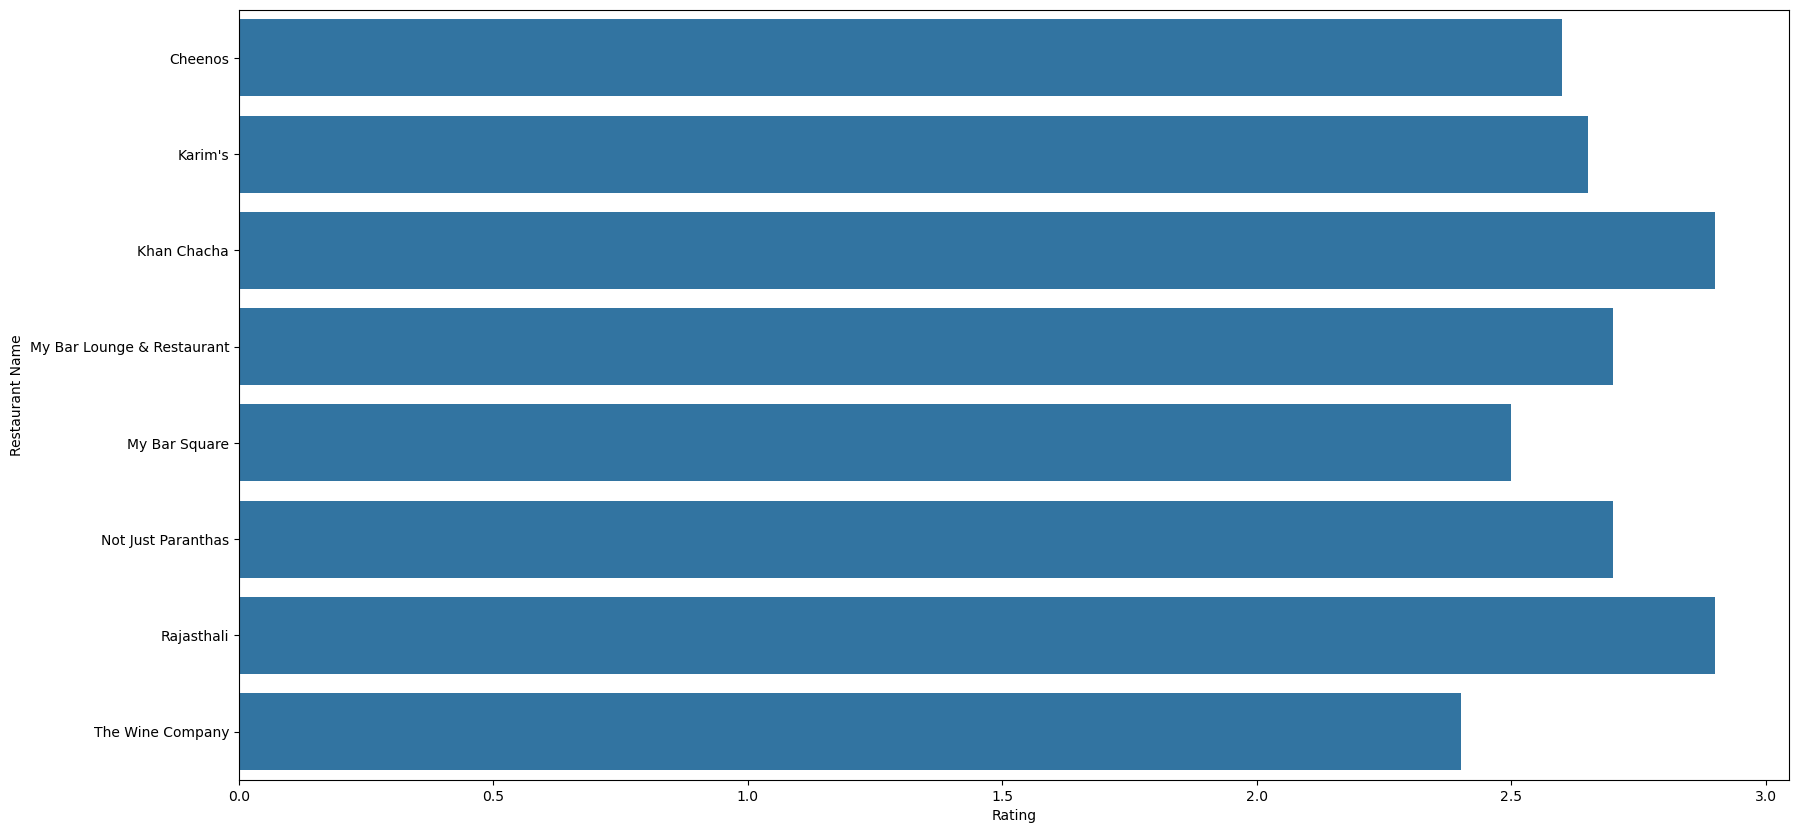

In [127]:
plt.figure(figsize=(20,10))

sns.barplot(x=worst_restaurants['Rating'],y=worst_restaurants.index)

plt.show()

These resturants have less rating.

 ## Location in which we have highest number of restaurants

In [139]:
h_location = data[['City']].value_counts()[0:20]
h_location

City        
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Amritsar          21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Mangalore         20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Abu Dhabi         20
Manchester        20
Agra              20
Kolkata           20
Kochi             20
Name: count, dtype: int64

In [112]:
top_locations = data['City'].value_counts().head(10).index
filtered_data = data[data['City'].isin(top_locations)]

print(filtered_data['City'].value_counts())


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Amritsar          21
Bhubaneshwar      21
Guwahati          21
Lucknow           21
Name: count, dtype: int64


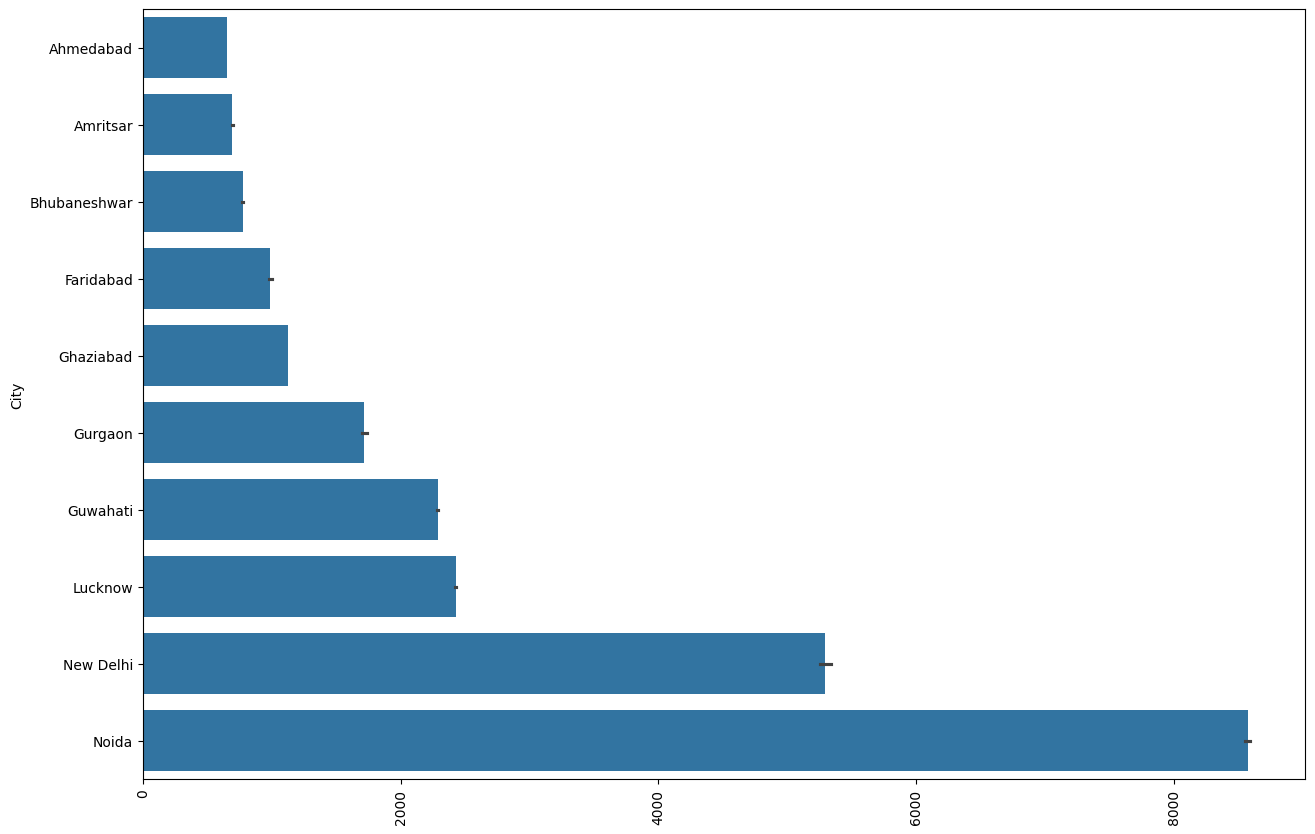

In [131]:
plt.figure(figsize=(15, 10))
sns.barplot(data=filtered_data['City'])
plt.xticks(rotation=90)
plt.show()


 Barplot of number of resturants whare many in same location

## Identify the top 10 cuisines

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


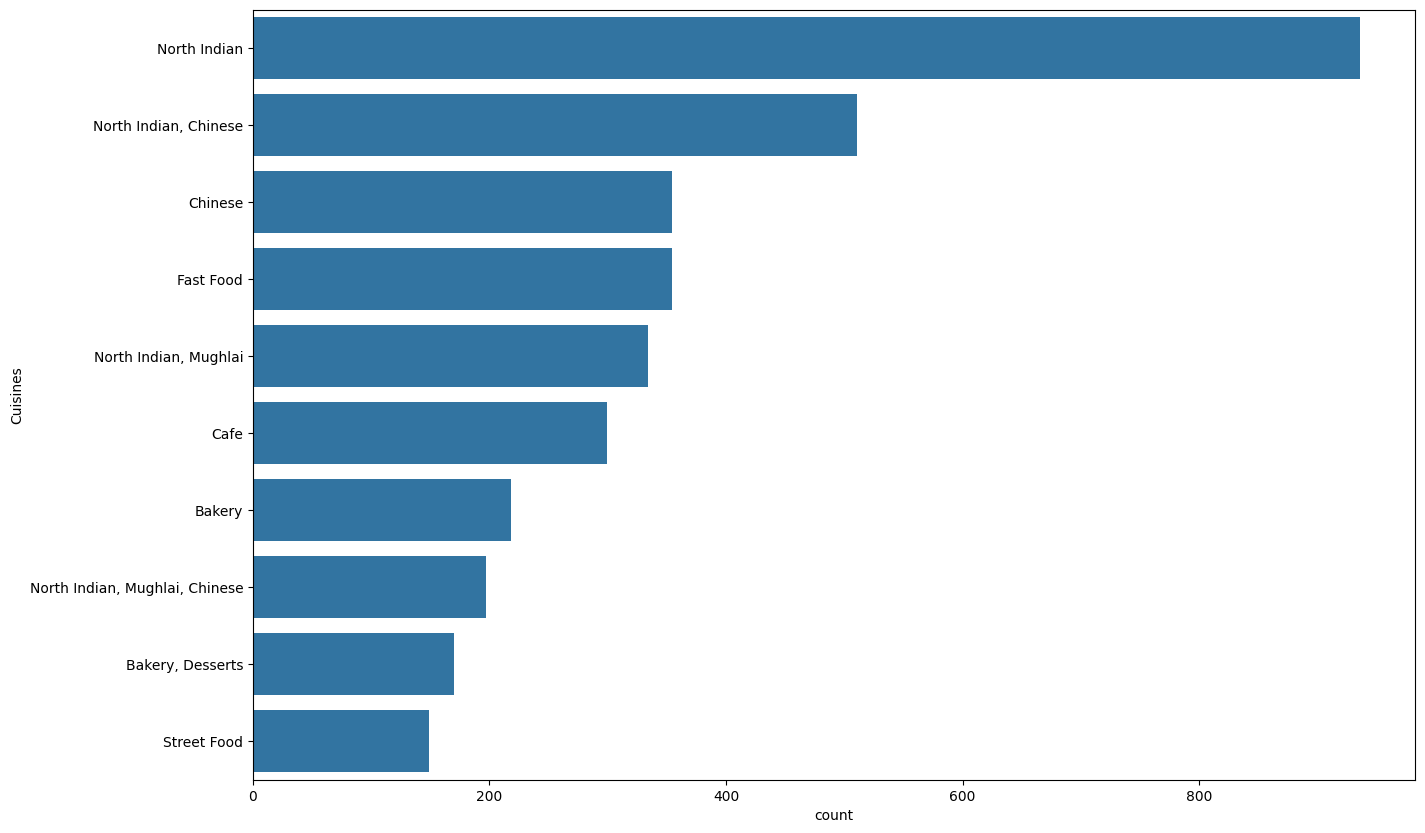

In [175]:
plt.figure(figsize=(15,10))
cusin = data.Cuisines.value_counts()[0:10]
print(cusin)

sns.barplot(y=cusin.index,x=cusin)
plt.show()

Barplot of top 10 cuisines preffered by customers

 ## Check the distribution for AVG cost of 2 people

In [181]:
data['Average Cost for two'].isna().sum()

0

In [183]:
data['Average Cost for two']

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9542, dtype: int64

In [215]:
a_fil_data = data[data['Average Cost for two'] < 10000]

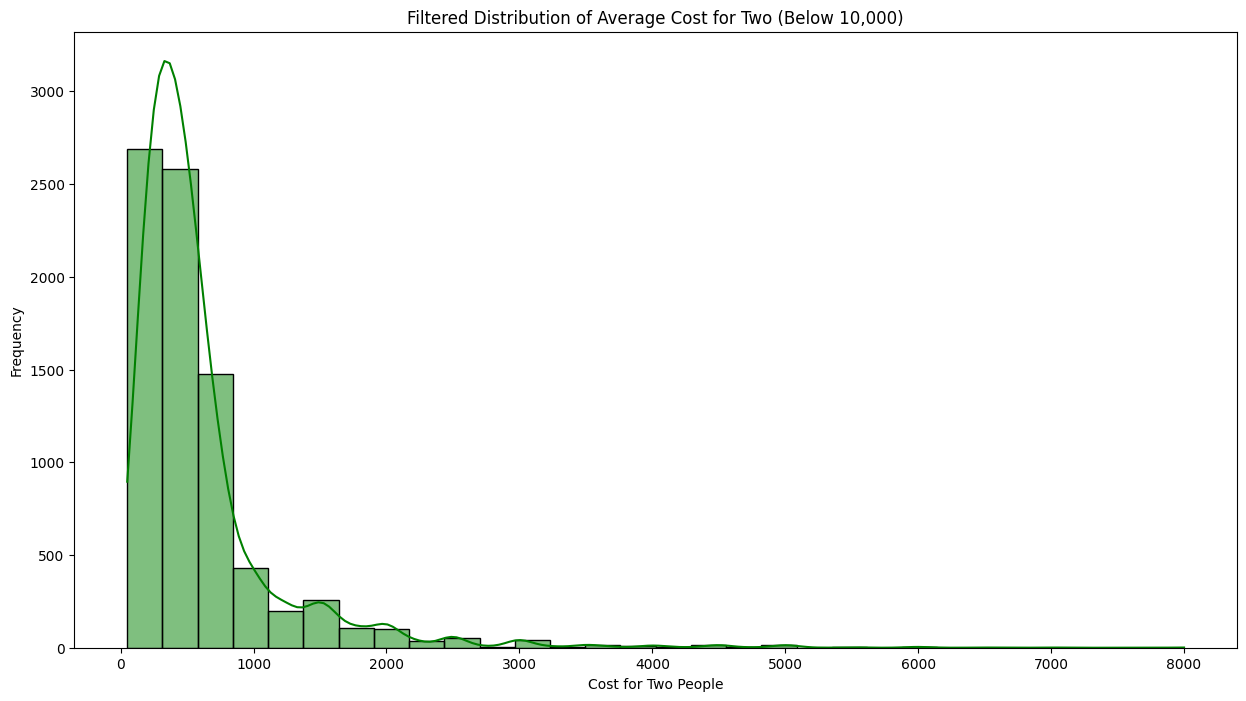

In [217]:
plt.figure(figsize=(15, 8))
sns.histplot(filtered_data['Average Cost for two'], bins=30, kde=True, color='green')
plt.title('Filtered Distribution of Average Cost for Two (Below 10,000)')
plt.xlabel('Cost for Two People')
plt.ylabel('Frequency')
plt.show()

 Cost for 2 people for most restaurants was varing from 500 to 1000 bucks.


## Conclusion : 

1. Sheroes Hangout, Yellow Dog Eats, Miann, Milse, Grandson of Tunday Kababi were the best rated Restaurants.

2. Cafe Cofee day, Domino's Pizza, Subway, Green Chick Chop were the top restaurant chains.

3. 74.3% of resturants accept online orders where as 25.7% do not accept online orders.

4. 85.4% resturants have table bookings and 12.1% does not have.

5. Based on most voted resaturants Tiot, The Black Pearl, Peter Cat were the best rated restaurants.

6. 'Toit' is the most voted resturant with the average rating of 4.8 and 'Cheenos' is the worst votes restaurant with the average rating of 2.60.

7. Noida, New delhi has the most number of restaurants.

8. North indian, Chinese were the top favorite Cuisines of the Customers.

9. Cost for 2 people for most restaurants was varing from 500 to 1000 bucks.

In this case study, we analyzed Zomato data to uncover insights regarding restaurant trends, customer preferences, and regional cuisine popularity. 
Here are the key takeaways:
- The dataset highlights regions with the highest density of restaurants, helping businesses understand competitive markets.
- Analysis of average ratings and customer feedback provided insights into factors affecting customer satisfaction.
- Cuisine preferences vary across locations, emphasizing the importance of localized menu offerings.

This analysis serves as a foundation for data-driven decision-making in the food and beverage industry, enabling stakeholders to optimize their strategies and improve customer experiences.
